# PyFume

In this notebook the pyFume libary is investigated

In [29]:
import pandas as pd
import numpy as np
from pyfume import *

In [39]:
#selected_features = ["Tave", "Tmax", "Tmin", "Relative_yield_change"]
selected_features = ['yield_of_CT', "Tmax", "Tmin", "Relative_yield_change"]
#selected_features = ['Relative_yield_change','yield_of_CT', 'Latitude', 'Longitude',
#       'Years_since_CT_started', 'Crop_rotation_CT', 'Crop_rotation_NT', 'ST',
#       'Soil_cover_in_CT', 'Soil_cover_in_CT', 'Weed_pest_control_CT',
#       'Weed_pest_control_NT', 'P', 'E', 'PB', 'Tave', 'Tmax', 'Tmin']
train_data = pd.read_csv("dataset/matlab_1_train.csv")[selected_features]
test_data = pd.read_csv("dataset/matlab_1_test.csv")[selected_features]

In [40]:
train_data

,yield_of_CT,Tmax,Tmin,Relative_yield_change
0,9558.0,28.42663,8.91625,-0.0070
1,9160.0,28.78427,4.50361,-0.0164
2,4500.0,26.48293,17.14181,-0.1333
3,8650.0,25.78936,8.37571,-0.0566
4,8565.0,31.98261,-5.42037,-0.0516
...,...,...,...,...
984,5258.0,28.01236,13.10176,-0.0765
985,8880.0,33.52842,25.72533,0.3131
986,7300.0,33.24197,3.26011,-0.0658
987,3108.0,30.64233,15.96019,0.0956


In [41]:
# Generate the Takagi-Sugeno FIS
FIS = pyFUME(dataframe=train_data, nr_clus=3)



In [42]:
# Calculate and print the accuracy of the generated model
RMSE=FIS.calculate_error(method="RMSE")
print ("The estimated RMSE of the developed model is:", RMSE)

The estimated RMSE of the developed model is: 0.2201863320039485


In [43]:
test = FIS.get_model()

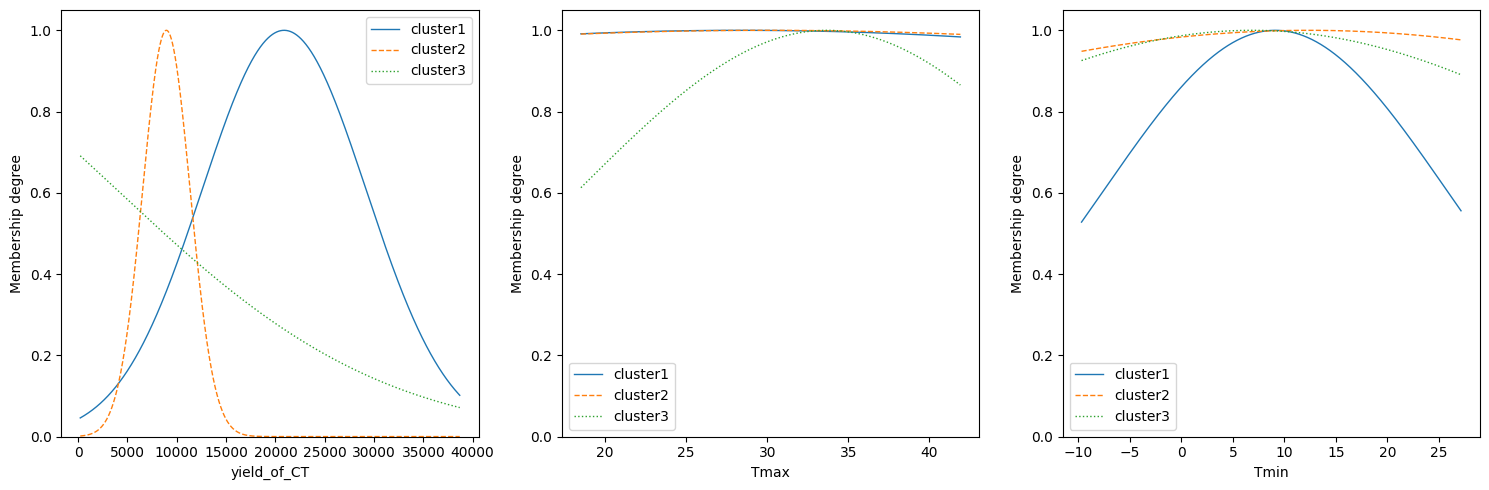

In [45]:
test.produce_figure()

In [46]:
test.get_rules()

['IF ((yield_of_CT IS cluster1) AND ((Tmax IS cluster1) AND (Tmin IS cluster1))) THEN (OUTPUT IS fun1)',
 'IF ((yield_of_CT IS cluster2) AND ((Tmax IS cluster2) AND (Tmin IS cluster2))) THEN (OUTPUT IS fun2)',
 'IF ((yield_of_CT IS cluster3) AND ((Tmax IS cluster3) AND (Tmin IS cluster3))) THEN (OUTPUT IS fun3)',
 'IF ((yield_of_CT IS cluster1) AND ((Tmax IS cluster1) AND (Tmin IS cluster1))) THEN (OUTPUT IS fun1)',
 'IF ((yield_of_CT IS cluster2) AND ((Tmax IS cluster2) AND (Tmin IS cluster2))) THEN (OUTPUT IS fun2)',
 'IF ((yield_of_CT IS cluster3) AND ((Tmax IS cluster3) AND (Tmin IS cluster3))) THEN (OUTPUT IS fun3)']

In [47]:
test._outputfunctions

OrderedDict([('fun1',
              '-7.240398e-06*yield_of_CT+5.054476e-03*Tmax+1.865404e-03*Tmin+-1.537795e-01'),
             ('fun2',
              '-4.045782e-06*yield_of_CT+5.620047e-03*Tmax+2.055391e-03*Tmin+-2.029618e-01'),
             ('fun3',
              '-8.085627e-06*yield_of_CT+9.724654e-03*Tmax+-1.170833e-03*Tmin+-2.610321e-01')])